# Multiclass Confusion Matrix 💈

---

<img src="https://resi.ze-robot.com/dl/to/tokyo-night-2-1366%C3%97768.jpg">


Photo by [Benjamin Hung](https://unsplash.com/@benjaminhung)

---

Now, we will play with Iris dataset again, that has a total fo 3 classes. Let's explore those results with our new tool: the **confusion matrix**.

In [1]:
import numpy as np
from sklearn.datasets import load_iris

np.random.seed(0)
iris = load_iris()
X, y, target_names = iris["data"], iris["target"], iris["target_names"]
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Q1**. Split your data into a training set of 80% of the data and a test set of 20%. Specify the `random_state` to 0 so that you get **reproducible** results.

In [5]:
# TODO: Split data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

(120, 4) (30, 4) (120,) (30,)


**Q2**. Fit a Logistic Regression on your data. Evaluate accuracy.

In [10]:
# TODO: Linear Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

reg = LogisticRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

/home/wafa/bin/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wafa/bin/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9666666666666667

**Q3**. Now we want to understand better the performance than just the global accuracy. Explore the function `confusion_matrix` of `sklearn`, and use it to display the confusion matrix of your model.

In [33]:
# TODO: Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred).T
cm

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  6]])

**Q4**. Before analyzing it. Let's visualize it more properly (with color, axes label etc.).

- Display the confusion matrix in a more visual way with `seaborn` library
- Verify that your axes are correct by comparing some values of the matrix with real values

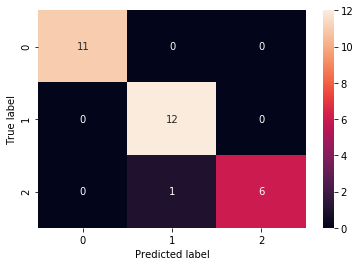

In [34]:
# TODO: Confusion matrix with seaborn
import seaborn as sns 
from matplotlib import pyplot as plt
sns.heatmap(cm, annot=True)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

**Q5**. Compute by hand Precision, Recall and F1_score

In [35]:
# TODO: Classificaiton metrics
#RMSE min

TP_FP = (y_pred == 1).sum()
N = (y_pred != 1).sum()

TN_TP = (y_pred == y_test).sum()

TP = ((y_pred == y_test) & (y_pred == 1)).sum()
TP
TN = ((y_pred == y_test) & (y_pred != 1)).sum()
FP = ((y_pred != y_test) & (y_pred == 1)).sum()
FN = ((y_pred != y_test) & (y_pred != 1)).sum()
FN

1

**Q6**. Again, there is a built-in function in scikit-learn in order to compute those scores easily.

It is called `classification_report`. Use it and compare with your previous numbers.

In [20]:
# TODO: classification_report
from sklearn.metrics import classification_report
scores = classification_report(y_test, y_pred)
print(scores)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



**Q7**. How would you analyze your model performance?

In [7]:
# TODO: classification_report